In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for data preprocessing
from sklearn.impute import SimpleImputer # for handling missing values
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical variables

# to create pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# for data splitting
from sklearn.model_selection import train_test_split

# for model building
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [35]:
data = pd.read_csv('/home/tanay/mlops/train.csv')

In [36]:
data.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
42088,42088,1.07,Ideal,D,SI1,61.2,57.0,6.64,6.60,4.05,5898
120376,120376,0.70,Ideal,D,SI1,62.2,55.0,5.70,5.74,3.56,2690
28801,28801,1.01,Ideal,G,VS2,61.6,56.0,6.47,6.44,3.98,7548
116067,116067,0.40,Ideal,E,SI1,61.8,56.0,4.78,4.74,2.94,810
67117,67117,1.01,Very Good,D,SI2,63.3,56.0,6.34,6.38,4.02,4663


In [37]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [38]:
data.size/1024

2079.3974609375

In [39]:
data.drop(labels="id", axis=1, inplace=True)

In [40]:
data.sample(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
36978,1.00,Very Good,G,SI1,62.3,60.0,6.34,6.39,3.96,4580
69593,0.42,Ideal,F,VVS2,61.6,57.0,4.83,4.85,2.98,1221
187742,0.41,Very Good,F,SI1,62.9,57.0,4.69,4.74,2.97,775
81301,0.40,Very Good,I,IF,63.6,57.0,4.67,4.66,2.97,1014
112718,0.31,Good,G,VS2,63.3,57.0,4.31,4.33,2.73,698


In [41]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"length is :{len(data[col].value_counts())}")
    print("=========================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
length is :5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
length is :7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
length is :8


### distribution of numerical columns

In [42]:
# plt.figure(figsize=(4, 3))

# for col in num_columns:
#     sns.histplot(data=data, x=col, kde=True)
#     plt.show()


<Axes: >

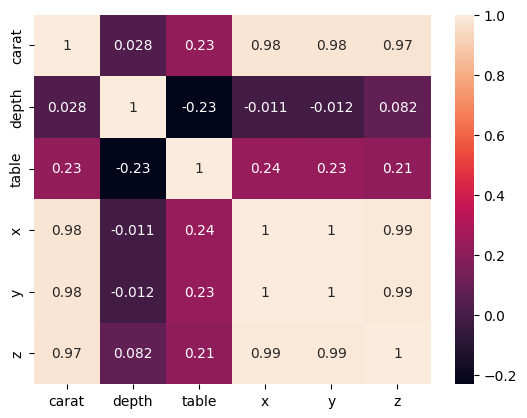

In [43]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [44]:
# # it is a oridinal encoding
# cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
# clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
# color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [45]:
# data["cut"]=data["cut"].map(cut_map)
# data["clarity"]=data["clarity"].map(clarity_map)
# data["color"]=data["color"].map(color_map)

In [46]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [47]:
X = data.drop(labels="price", axis=1)
Y = data["price"]

In [48]:
cat_columns = X.select_dtypes(include=['object'],).columns

In [49]:
num_columns = X.select_dtypes(exclude=['object']).columns

In [50]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer()), # to handle missing values
        ("scaler",StandardScaler()) # to normalize the data
    ]
) # this pipeline contain stages to process numerical data

In [51]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [52]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")), # to handle missing values
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])) # to encode the data
    ]
) # this pipeline contain stages to process categorical data

In [53]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [54]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_columns), # apply num_pipeline on num_columns and naming it as numerical_pipeline
        ("cat_pipeline", cat_pipeline, cat_columns) # apply cat_pipeline on cat_columns and naming it as categorical_pipeline
    ]
)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [56]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
11504,0.41,Ideal,E,VVS2,60.6,56.0,4.85,4.80,2.93
95284,1.23,Very Good,H,VS1,59.9,59.0,6.91,7.01,4.19
184777,1.70,Premium,H,VS2,62.0,58.0,7.61,7.66,4.74
5419,0.33,Ideal,F,VVS1,61.2,56.0,4.47,4.44,2.73
45466,0.33,Very Good,I,SI1,62.1,58.0,4.41,4.45,2.75
...,...,...,...,...,...,...,...,...,...
119879,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09
103694,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87
131932,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26
146867,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67


In [57]:
preprocessor.fit_transform(x_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [58]:
preprocessor.transform(x_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  3.        ]])

In [59]:
preprocessor.get_feature_names_out() # this will give the name of the columns which got transformed

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [60]:
X_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out()) # transforming train data and converting it into dataframe
X_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out()) # transforming test data and converting it into dataframe

# model building

In [62]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [75]:
trained_model_list=[]
model_list=[]
r2_list=[]
mae_results=[]
mse_results=[]

In [64]:
list(models) # this will give the name(keys) of the models

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [70]:
def evaluate_model(true, predicted):
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    
    return mse, mae, r2

In [76]:
for i in range(len(list(models))):
    
    model=list(models.values())[i] # this will give the model one by one

    model.fit(X_train,y_train) # fitting the model

    y_pred=model.predict(X_test) # predicting the model

    MSE, MAE, R2 = evaluate_model(y_test,y_pred) # evaluating the model
    

    print(f"Model : {list(models)[i]}")
    print(f"Mean Squared Error : {MSE}")
    print(f"Mean Absolute Error : {MAE}")
    print(f"R2 Score : {R2}")

    # appending the results to the list
    r2_list.append(R2)
    mae_results.append(MAE)
    mse_results.append(MSE)

    print("="*20)
    print("\n")

Model : LinearRegression
Mean Squared Error : 1029473.3531156892
Mean Absolute Error : 675.075827006745
R2 Score : 0.9362906819996045


Model : Lasso
Mean Squared Error : 1029534.1175907081
Mean Absolute Error : 676.3788803086726
R2 Score : 0.9362869215688461


Model : Ridge
Mean Squared Error : 1029482.8329815767
Mean Absolute Error : 675.1087261318743
R2 Score : 0.9362900953347932


Model : Elasticnet
Mean Squared Error : 2291130.057094769
Mean Absolute Error : 1051.1722281863017
R2 Score : 0.8582126162411592


Model : Randomforest
Mean Squared Error : 373781.93950211967
Mean Absolute Error : 310.16331148859814
R2 Score : 0.9768683741308367


Model : xgboost
Mean Squared Error : 345616.14680618217
Mean Absolute Error : 297.25052956080435
R2 Score : 0.978611409664154




In [74]:
r2_list

[0.9362906819996045,
 0.9362869215688461,
 0.9362900953347932,
 0.8582126162411592,
 0.976931245996211,
 0.978611409664154]

In [ ]:
# so xgboost sabse acha hai toh hum usko use karenge production mein